1/1 [==============================] - 0s 230ms/step


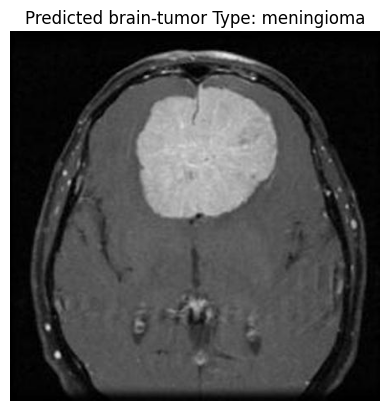

Predicted brain-tumor Type: meningioma

Probabilities:
	glioma: 15.38%
	meningioma: 84.62%
	notumor: 0.00%
	pituitary: 0.00%


In [2]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('trained_model_for_brain_tumor.h5')

# Function to preprocess the image
def preprocess_image(image_path, image_size):
    img = Image.open(image_path)
    img = img.convert('RGB')
    img = img.resize(image_size)
    img_array = np.array(img)
    img_array = img_array.astype(np.float32) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# List of interior types
brain_tumor_types = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Replace this with the image file path you want to test
#image_file = './image_set/Testing/glioma/Te-gl_0020.jpg'
#image_file = './image_set/Testing/meningioma/Te-me_0010.jpg'
# image_file = './image_set/Testing/pictuitary/Te-pi_0010.jpg'
#image_file = './image_set/Testing/notumor/Te-no_0010.jpg'
image_file = 'test.jpg'
image_size = (150, 150)

# Preprocess the test image
test_image = preprocess_image(image_file, image_size)

# Make prediction
prediction = model.predict(test_image)
predicted_class = np.argmax(prediction, axis=1)[0]
predicted_type = brain_tumor_types[predicted_class]

# Get probabilities for all interior types
probabilities = prediction[0]

# Display the test image and prediction
img = cv2.imread(image_file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted brain-tumor Type: {predicted_type}')
plt.show()

# Print predicted interior type and probabilities
print(f'Predicted brain-tumor Type: {predicted_type}')
print('\nProbabilities:')
for brain_tumor_type, probability in zip(brain_tumor_types, probabilities):
    print(f'\t{brain_tumor_type}: {probability * 100:.2f}%')
